# ARIMA

Sử dụng mô hình dữ liệu chuỗi thời gian ARIMA, dựa vào giá đóng cửa của cổ phiếu trong quá khứ để phản ánh diễn biến giá cổ phiếu trong tương lai. Mô hình **ARIMA – Autoregressive Intergrated Moving Average** là mô hình được sử dụng để phân tích thống kê dữ liệu chuỗi thời gian (Time-series), mô hình này giúp chúng ta phân tích và dự đoán xu hướng trong tương lai. Phương pháp phân tích này thể hiện mối quan hệ giữa giá trị quá khứ được quan sát cho phép dự đoán giá trị tương lai trong ngắn hạn. Phương pháp này gồm ba tham số:
-	*AR (auto regression):* tự hồi quy. (tham số p)
-	*MA (moving average):* trung bình trượt. (tham số d)
-	*I (intergrated):* kết hợp. (tham số q)

Mô hình ARIMA là mô hình hồi quy kết hợp trung bình trượt được đặc tả qua 3 tham số ARIMA (p, d, q) và biểu diễn phương trình hồi quy tuyến tính đa biến. Để sử dụng ARIMA gồm bốn quy trình:
-	Kiểm tra xác nhận tính dừng của dữ liệu (`stationary`): sử dụng làm để xác định tham số d.
-	Ước tính tham số: mô hình ARIMA sử dụng các tham số p, d, q. Trong quá trình ước lượng tham số cần chú ý đến cách xác định p và q.
-	Kiểm tra: đảm bảo mô hình được xác định chính xác và phù hợp với dữ liệu.
-	Dự báo: sử dụng mô hình ARIMA để dự đoán xu hướng tương lai.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error 
import statsmodels.api as sm
import itertools
import warnings
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
warnings.filterwarnings("ignore")

## Kiểm định tính dừng của dữ liệu.

Hầu hết các chuỗi thời gian đều không dừng, và các thành phần AR và MA của mô hình ARIMA chỉ liên quan đến các chuỗi thời gian dừng. Quy trình ngẫu nhiên của giá cổ phiếu được xem là dừng nếu trung bình và phương sai của quá trình không thay đổi theo thời gian và giá đồng phương sai giữa hai thòi đoạn chỉ phụ thuộc vào khoảng cách độ trễ về thời gian giữa các giai đoạn này chứ không phụ thuộc vào thời điểm thực tế mà đồng phương sai được tính. Do đó để nhận diện mô hình ARIMA cần thực hiện kiểm định tính dừng dựa vào kiểm định Dickey – Fuller.



` d (Thứ tự sai phân): Số lần sai phân được áp dụng để làm cho chuỗi thời gian có tính dừng. `

In [2]:
df = pd.read_csv('stock_data_output/VN30.csv')
df.drop(columns= 'Unnamed: 0', inplace= True)
df.set_index('Date', inplace= True)
df.index.name = None
df.head()

,AGR,BID,VCB,CTG
2017-01-03,2380,9800,23210,9970
2017-01-04,2290,9990,23050,10160
2017-01-05,2330,9960,23150,10220
2017-01-06,2320,10180,23610,10310
2017-01-09,2350,10480,24110,10590


In [3]:
for col in df.columns:
    result = adfuller(df[col])
    print('{} stock ADF Statistic: %f'.format(col) % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

AGR stock ADF Statistic: -0.912477
p-value: 0.783836
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
BID stock ADF Statistic: -1.114816
p-value: 0.709127
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
VCB stock ADF Statistic: -0.682688
p-value: 0.851183
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
CTG stock ADF Statistic: -1.280243
p-value: 0.638162
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


Sử dụng thư viện Statsmodel của Python để thực hiện kiểm định Dickey - Fuller. Ở đây có thể thấy rằng p-values > 0.05, điều này có nghĩa là giả thuyết dữ liệu có tính dừng bị bác bỏ và sẽ coi chuỗi dữ liệu này là chuỗi không dừng. 

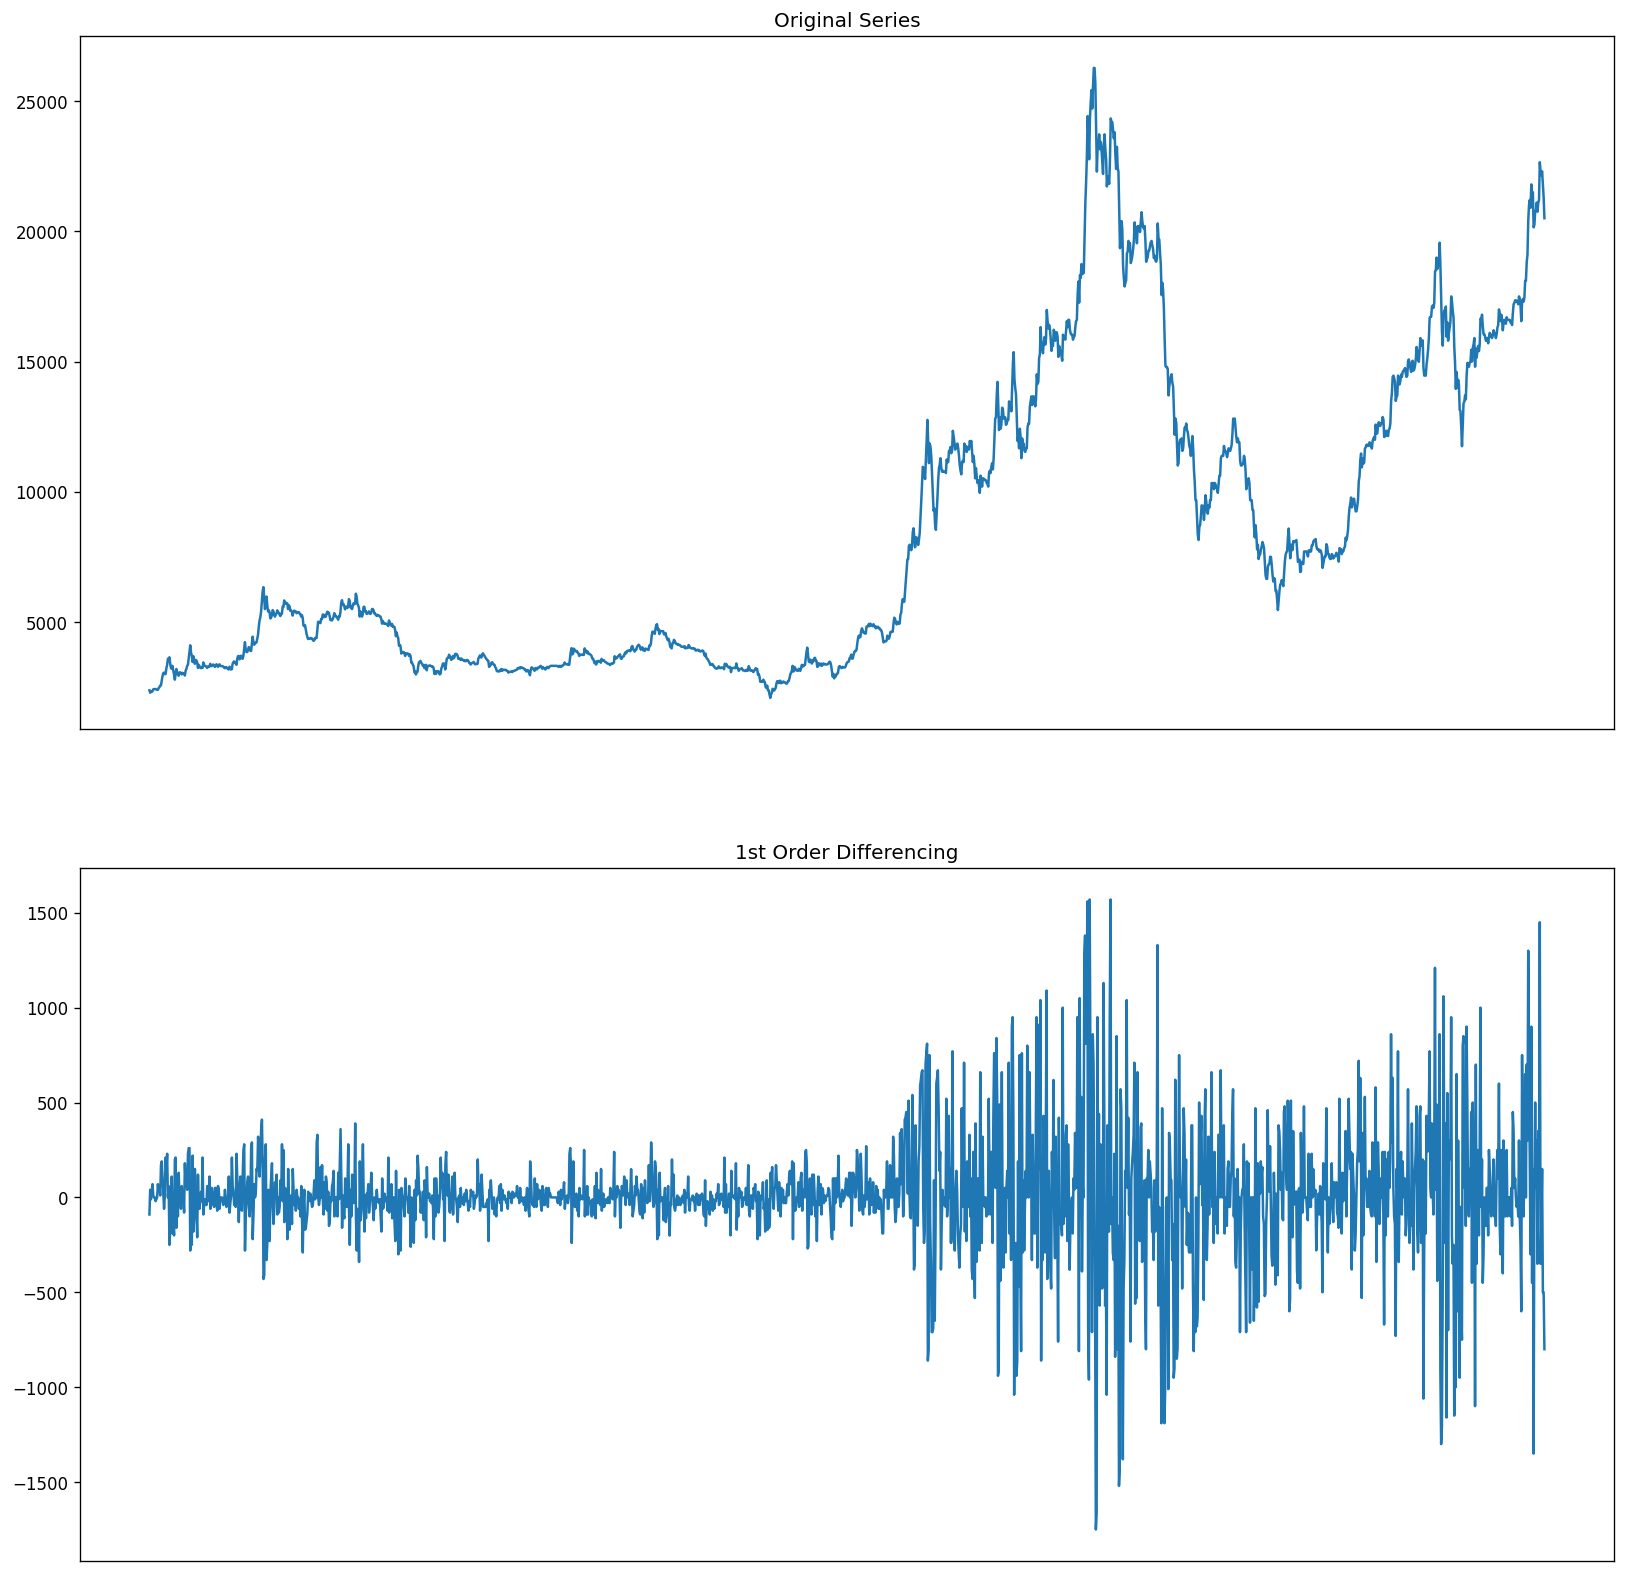

In [4]:
# Original Series
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(df.AGR); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(df.AGR.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
fig.set_size_inches(16.5, 16.5)

In [18]:
for col in df.columns:
    result = adfuller(df[col].diff().dropna())
    print('{} stock ADF Statistic: %f'.format(col) % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

AGR stock ADF Statistic: -7.777377
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
BID stock ADF Statistic: -44.178811
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
VCB stock ADF Statistic: -26.049513
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
CTG stock ADF Statistic: -44.427516
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


## Tìm trọng số của mô hình `ARIMA(p,d,q)` sao cho AIC nhỏ nhất.

`AIC (Akaike Information Criterion)`
- Thước đo định lượng mức độ phù hợp của mô hình với dữ liệu.
- Giá trị AIC thấp hơn cho thấy mô hình tốt hơn.
- Chúng tôi thường chọn mô hình ARIMA tốt nhất bằng cách so sánh điểm AIC cho các kết hợp tham số khác nhau. Quá trình này bao gồm việc điều chỉnh các mô hình ARIMA cho các giá trị p và q khác nhau và chọn mô hình có AIC thấp nhất.

In [5]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [6]:
minPar = (0,0,0)
minParS = (0,0,0,0)
minAIC = 10**9

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df.AGR,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit(disp=0)
            if minAIC > results.aic:
                minPar = param
                minParS = param_seasonal
                minAIC = results.AIC

        except:
            continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06325D+01    |proj g|=  5.18696D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   5.187D-08   1.063D+01
  F =   10.632459844080335     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.02179D+01    |proj g|=  4.21583D-02

At iterate   10    f=  1.02176D+01    |proj g|=  1.53857D-03

At iterate   15    f=  1.02174D+01    |proj g|=  3.69756D-02

At iterate   20    f=  1.01504D+01    |proj g|=  1.86003D+00

At iterate   25    f=  9.96470D+00    |proj g|=  3.44598D-01

At iterate   30    f=  9.96094D+00    |proj g|=  1.43364D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     32     42      1     0     0   2.664D-05   9.961D+00
  F =   9.9609388902120291     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.45412D+00    |proj g|=  1.99283D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      6      1     0     0   8.463D-06   8.439D+00
  F =   8.4385572655560548     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.4

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  8.49130D+00    |proj g|=  4.06170D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   6.873D-06   8.491D+00
  F =   8.4913012096849201     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.44296D+00    |proj g|=  4.92637D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.45287D+00    |proj g|=  1.89872D-01

At iterate    5    f=  8.43863D+00    |proj g|=  8.23703D-03

At iterate   10    f=  8.43667D+00    |proj g|=  4.91798D-03

At iterate   15    f=  8.43621D+00    |proj g|=  9.60966D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     20      1     0     0   1.838D-05   8.436D+00
  F =   8.4362140854647460     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  1.02583D+01    |proj g|=  6.21407D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      9     19      1     0     0   7.306D-05   1.026D+01
  F =   10.258027538044457     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.05656D+01    |proj g|=  7.94653D-01


 This problem is unconstrained.



At iterate    5    f=  1.01006D+01    |proj g|=  2.83514D-02

At iterate   10    f=  1.01003D+01    |proj g|=  9.03988D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     25      1     0     0   9.040D-05   1.010D+01
  F =   10.100273783174453     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.20238D+00    |proj g|=  5.06906D-01

At iterate    5    f=  8.13202D+00    |proj g|=  4.84403D-04


 This problem is unconstrained.



At iterate   10    f=  8.13191D+00    |proj g|=  1.81447D-02

At iterate   15    f=  8.11686D+00    |proj g|=  2.72642D-01

At iterate   20    f=  7.99689D+00    |proj g|=  2.47193D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     23     25      1     0     0   2.524D-05   7.997D+00
  F =   7.9968451845258173     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.15781D+00    |proj g|=  4.96460D-01

At iterate    5    f=  8.07862D+00    |proj g|=  4.79545D-04

At iterate   10    f=  8.07625D+00    |proj g|=  4.13854D-02

At iterate   15    f=  7.95684D+00    |proj g|=  1.13410D-01

At iterate   20    f=  7.94560D+00    |proj g|=  7.32341D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     26      1     0     0   9.006D-08   7.946D+00
  F =   7.9456049354462834     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  1.00742D+01    |proj g|=  1.62670D-03

At iterate   10    f=  1.00742D+01    |proj g|=  3.94959D-04

At iterate   15    f=  1.00741D+01    |proj g|=  6.08850D-03

At iterate   20    f=  1.00638D+01    |proj g|=  7.34795D-02

At iterate   25    f=  9.51614D+00    |proj g|=  6.38437D-01

At iterate   30    f=  8.49556D+00    |proj g|=  4.27214D+00

At iterate   35    f=  8.01104D+00    |proj g|=  9.12323D-02

At iterate   40    f=  8.00475D+00    |proj g|=  1.70679D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     40     72      1     0     0   1.707D-05   8.005D+00
  F =   8.00474935590

 This problem is unconstrained.



At iterate    5    f=  1.00630D+01    |proj g|=  8.38846D-04

At iterate   10    f=  1.00630D+01    |proj g|=  3.46254D-04

At iterate   15    f=  1.00596D+01    |proj g|=  8.73395D-03

At iterate   20    f=  9.84808D+00    |proj g|=  2.01796D-01

At iterate   25    f=  8.56197D+00    |proj g|=  5.43577D-01

At iterate   30    f=  8.20241D+00    |proj g|=  2.49017D-01

At iterate   35    f=  8.07160D+00    |proj g|=  1.82580D-01

At iterate   40    f=  8.02473D+00    |proj g|=  4.47688D-01

At iterate   45    f=  8.01097D+00    |proj g|=  3.52314D-02

At iterate   50    f=  8.00413D+00    |proj g|=  6.05446D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.15832D+00    |proj g|=  5.03408D-01

At iterate    5    f=  8.08756D+00    |proj g|=  4.80256D-04

At iterate   10    f=  8.08735D+00    |proj g|=  2.21867D-02

At iterate   15    f=  8.05664D+00    |proj g|=  4.05421D-01

At iterate   20    f=  7.95427D+00    |proj g|=  3.06729D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     26      1     0     0   2.369D-06   7.954D+00
  F =   7.9542639049548107     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  8.07859D+00    |proj g|=  4.79594D-04

At iterate   10    f=  8.07855D+00    |proj g|=  1.08578D-02

At iterate   15    f=  8.07814D+00    |proj g|=  7.27831D-04

At iterate   20    f=  8.07219D+00    |proj g|=  2.26642D-03

At iterate   25    f=  8.00583D+00    |proj g|=  4.26122D-01

At iterate   30    f=  7.94652D+00    |proj g|=  6.98745D-03

At iterate   35    f=  7.94530D+00    |proj g|=  8.67884D-03

At iterate   40    f=  7.94526D+00    |proj g|=  1.83665D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     40     62      1     0     0   1.837D-05   7.945D+00
  F =   7.94526211274

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.11088D+00    |proj g|=  1.14257D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      4      1     0     0   3.295D-05   7.111D+00
  F =   7.1108832652148086     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.4

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.13483D+00    |proj g|=  2.31301D-01

At iterate    5    f=  7.09367D+00    |proj g|=  9.28770D-03

At iterate   10    f=  7.09366D+00    |proj g|=  5.25575D-03

At iterate   15    f=  7.09329D+00    |proj g|=  7.69383D-02

At iterate   20    f=  7.08028D+00    |proj g|=  1.61728D-01

At iterate   25    f=  7.07684D+00    |proj g|=  5.75042D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     27     32      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.11088D+00    |proj g|=  9.77185D-05

At iterate    5    f=  7.11088D+00    |proj g|=  2.80080D-04

At iterate   10    f=  7.11086D+00    |proj g|=  2.74116D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     19      1     0     0   3.679D-06   7.111D+00
  F =   7.1108511703185471     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.14820D+00    |proj g|=  2.15409D-01

At iterate    5    f=  7.09366D+00    |proj g|=  6.32555D-02

At iterate   10    f=  7.09301D+00    |proj g|=  9.48218D-04

At iterate   15    f=  7.09292D+00    |proj g|=  3.29071D-02

At iterate   20    f=  7.08850D+00    |proj g|=  1.47135D-01

At iterate   25    f=  7.07684D+00    |proj g|=  4.86017D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     36      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      6      1     0     0   1.733D-05   7.100D+00
  F =   7.0996569221734322     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.42955D+00    |proj g|=  1.35185D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.17849D+00    |proj g|=  1.53181D-01

At iterate    5    f=  7.15290D+00    |proj g|=  5.06344D-02

At iterate   10    f=  7.15229D+00    |proj g|=  1.73116D-03

At iterate   15    f=  7.15089D+00    |proj g|=  5.80780D-02

At iterate   20    f=  7.12356D+00    |proj g|=  2.08257D-01

At iterate   25    f=  7.06588D+00    |proj g|=  3.65796D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     41      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.09966D+00    |proj g|=  2.57857D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     13      1     0     0   4.828D-05   7.100D+00
  F =   7.0996560602135164     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.27456D+00    |proj g|=  4.01273D-02


 This problem is unconstrained.



At iterate    5    f=  7.27353D+00    |proj g|=  2.75413D-03

At iterate   10    f=  7.27222D+00    |proj g|=  4.50542D-02

At iterate   15    f=  7.25809D+00    |proj g|=  3.24616D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     22      1     0     0   5.182D-06   7.258D+00
  F =   7.2575354429561116     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18820D+00    |proj g|=  1.42165D-01


 This problem is unconstrained.



At iterate    5    f=  7.15319D+00    |proj g|=  2.92798D-02

At iterate   10    f=  7.15228D+00    |proj g|=  1.65780D-03

At iterate   15    f=  7.14742D+00    |proj g|=  1.34945D-01

At iterate   20    f=  7.07257D+00    |proj g|=  1.23677D-01

At iterate   25    f=  7.06583D+00    |proj g|=  8.70202D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     37      1     0     0   1.334D-06   7.066D+00
  F =   7.0658300969080887     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.15851D+00    |proj g|=  5.21014D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     14      1     0     0   5.210D-03   7.159D+00
  F =   7.1585138590243993     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.4

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.51180D+00    |proj g|=  7.55009D-01

At iterate    5    f=  7.17043D+00    |proj g|=  3.10213D-01

At iterate   10    f=  7.16206D+00    |proj g|=  5.24687D-03

At iterate   15    f=  7.16199D+00    |proj g|=  2.13173D-02

At iterate   20    f=  7.13962D+00    |proj g|=  4.14280D-01

At iterate   25    f=  7.08326D+00    |proj g|=  6.13977D-02

At iterate   30    f=  7.08070D+00    |proj g|=  2.05711D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     64      1     0     0   4.777D-04   7.081D+00
  F =   7.0807014161381945     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.60431D+00    |proj g|=  9.98979D-01

At iterate    5    f=  7.40106D+00    |proj g|=  1.16915D+00

At iterate   10    f=  7.11454D+00    |proj g|=  1.22441D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     33      1     0     0   2.387D-05   7.114D+00
  F =   7.1143365316689033     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.92928D+00    |proj g|=  1.72333D+00

At iterate    5    f=  7.20303D+00    |proj g|=  4.23646D+00

At iterate   10    f=  7.11507D+00    |proj g|=  5.97970D-02

At iterate   15    f=  7.11503D+00    |proj g|=  1.00094D-02

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.41529D+00    |proj g|=  5.22159D-01

At iterate    5    f=  7.27039D+00    |proj g|=  1.32231D-03

At iterate   10    f=  7.26995D+00    |proj g|=  8.40588D-02

At iterate   15    f=  7.25563D+00    |proj g|=  1.29539D-01

At iterate   20    f=  7.25465D+00    |proj g|=  3.93836D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     26      1     0     0   3.938D-06   7.255D+00
  F =   7.2546529188802849     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  7.19704D+00    |proj g|=  9.40435D-01

At iterate   10    f=  7.16375D+00    |proj g|=  2.31315D-01

At iterate   15    f=  7.16205D+00    |proj g|=  1.06567D-03

At iterate   20    f=  7.16205D+00    |proj g|=  1.76854D-02

At iterate   25    f=  7.16168D+00    |proj g|=  2.06781D-01

At iterate   30    f=  7.13361D+00    |proj g|=  1.04348D+00

At iterate   35    f=  7.08286D+00    |proj g|=  4.82403D-01

At iterate   40    f=  7.08070D+00    |proj g|=  2.39625D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     43     52      1     0     0   3.835D-05   7.081D+00
  F =   7.08069272795

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.37972D+00    |proj g|=  2.80624D-01

At iterate   10    f=  7.37900D+00    |proj g|=  2.00484D-02

At iterate   15    f=  7.37895D+00    |proj g|=  4.44767D-03

At iterate   20    f=  7.37890D+00    |proj g|=  6.75838D-02

At iterate   25    f=  7.37480D+00    |proj g|=  2.59865D-01

At iterate   30    f=  7.20570D+00    |proj g|=  5.70497D-01

At iterate   35    f=  7.14407D+00    |proj g|=  8.67428D-01

At iterate   40    f=  7.11666D+00    |proj g|=  1.44797D-01

At iterate   45    f=  7.10922D+00    |proj g|=  1.72473D-01

At iterate   50    f=  7.10633D+00    |proj g|=  3.52646D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.48518D+00    |proj g|=  7.23059D-01

At iterate    5    f=  7.15469D+00    |proj g|=  4.40949D-01

At iterate   10    f=  7.14676D+00    |proj g|=  5.37955D-02

At iterate   15    f=  7.14673D+00    |proj g|=  6.23148D-03

At iterate   20    f=  7.14654D+00    |proj g|=  1.06805D-01

At iterate   25    f=  7.13206D+00    |proj g|=  2.10454D+00

At iterate   30    f=  7.07919D+00    |proj g|=  8.46500D-01

At iterate   35    f=  7.06965D+00    |proj g|=  2.19231D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.58743D+00    |proj g|=  9.85010D-01

At iterate    5    f=  7.36098D+00    |proj g|=  1.48901D+00

At iterate   10    f=  7.12753D+00    |proj g|=  3.11725D-01

At iterate   15    f=  7.10692D+00    |proj g|=  1.69384D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     27      1     0     0   1.540D-05   7.107D+00
  F =   7.1069125385996879     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  7.15948D+00    |proj g|=  1.06707D+00

At iterate   10    f=  7.11361D+00    |proj g|=  1.48254D-01

At iterate   15    f=  7.10459D+00    |proj g|=  3.82558D-03

At iterate   20    f=  7.10424D+00    |proj g|=  6.31684D-02

At iterate   25    f=  7.10325D+00    |proj g|=  1.19546D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     35      1     0     0   1.115D-04   7.103D+00
  F =   7.1032397811689458     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

 This problem is unconstrained.



At iterate    5    f=  7.26056D+00    |proj g|=  9.77712D-03

At iterate   10    f=  7.26055D+00    |proj g|=  2.98895D-03

At iterate   15    f=  7.26017D+00    |proj g|=  3.98990D-02

At iterate   20    f=  7.25061D+00    |proj g|=  1.59745D-01

At iterate   25    f=  7.24665D+00    |proj g|=  2.23110D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     29      1     0     0   2.231D-05   7.247D+00
  F =   7.2466455469548539     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate    5    f=  7.18492D+00    |proj g|=  1.17934D-01

At iterate   10    f=  7.15618D+00    |proj g|=  1.07519D-01

At iterate   15    f=  7.14672D+00    |proj g|=  3.04084D-03

At iterate   20    f=  7.14668D+00    |proj g|=  5.25048D-02

At iterate   25    f=  7.14257D+00    |proj g|=  4.68203D-01

At iterate   30    f=  7.08301D+00    |proj g|=  1.82560D-01

At iterate   35    f=  7.07049D+00    |proj g|=  4.14918D-02

At iterate   40    f=  7.06958D+00    |proj g|=  1.93358D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     55      1     0     0   6.490D-05   7.070D+00
  F =   7.06957798520

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      8      1     0     0   2.037D-05   7.103D+00
  F =   7.1030468172473622     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.43361D+00    |proj g|=  5.05986D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18190D+00    |proj g|=  1.53572D-01


 This problem is unconstrained.



At iterate    5    f=  7.15641D+00    |proj g|=  5.20235D-02

At iterate   10    f=  7.15580D+00    |proj g|=  1.08695D-03

At iterate   15    f=  7.15530D+00    |proj g|=  2.01481D-02

At iterate   20    f=  7.12453D+00    |proj g|=  2.61427D-01

At iterate   25    f=  7.06940D+00    |proj g|=  1.08091D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     35      1     0     0   2.682D-06   7.069D+00
  F =   7.0693993554464241     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.10308D+00    |proj g|=  7.48271D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      5      1     0     0   2.036D-05   7.103D+00
  F =   7.1030460718595965     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.1

 This problem is unconstrained.



At iterate    5    f=  7.26962D+00    |proj g|=  1.76515D-03

At iterate   10    f=  7.26902D+00    |proj g|=  3.05612D-02

At iterate   15    f=  7.25424D+00    |proj g|=  1.90009D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     21      1     0     0   2.152D-06   7.254D+00
  F =   7.2538481715345782     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19157D+00    |proj g|=  1.42670D-01


 This problem is unconstrained.



At iterate    5    f=  7.15673D+00    |proj g|=  2.99398D-02

At iterate   10    f=  7.15579D+00    |proj g|=  1.08706D-03

At iterate   15    f=  7.15407D+00    |proj g|=  5.48586D-02

At iterate   20    f=  7.08115D+00    |proj g|=  9.50343D-02

At iterate   25    f=  7.06935D+00    |proj g|=  7.63391D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     35      1     0     0   1.671D-05   7.069D+00
  F =   7.0693522639468993     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      3      8      1     0     0   1.799D-04   7.099D+00
  F =   7.0993445048086308     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.42953D+00    |proj g|=  5.60887D-04

At iterate    5    f=  7.42953D+00    |proj g|=  2.39115D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.17844D+00    |proj g|=  1.53209D-01


 This problem is unconstrained.



At iterate    5    f=  7.15281D+00    |proj g|=  4.95598D-02

At iterate   10    f=  7.15191D+00    |proj g|=  5.92618D-03

At iterate   15    f=  7.15153D+00    |proj g|=  5.01694D-03

At iterate   20    f=  7.13395D+00    |proj g|=  7.01174D-02

At iterate   25    f=  7.06573D+00    |proj g|=  1.34119D-02

At iterate   30    f=  7.06563D+00    |proj g|=  5.91480D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     43      1     0     0   1.938D-06   7.066D+00
  F =   7.0656335387061491     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.10305D+00    |proj g|=  7.15054D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2      4      1     0     0   1.867D-04   7.103D+00
  F =   7.1030240101895297     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.0

 This problem is unconstrained.



At iterate    5    f=  7.26967D+00    |proj g|=  2.37357D-03

At iterate   10    f=  7.26946D+00    |proj g|=  3.82005D-03

At iterate   15    f=  7.26766D+00    |proj g|=  4.18131D-02

At iterate   20    f=  7.25498D+00    |proj g|=  3.94056D-02

At iterate   25    f=  7.25375D+00    |proj g|=  5.50842D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     32      1     0     0   8.565D-06   7.254D+00
  F =   7.2537454912559687     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate    5    f=  7.15329D+00    |proj g|=  3.08879D-02

At iterate   10    f=  7.15227D+00    |proj g|=  1.62424D-03

At iterate   15    f=  7.15209D+00    |proj g|=  2.04195D-02

At iterate   20    f=  7.15181D+00    |proj g|=  3.98576D-03

At iterate   25    f=  7.15056D+00    |proj g|=  3.33120D-02

At iterate   30    f=  7.10667D+00    |proj g|=  2.71273D-01

At iterate   35    f=  7.07320D+00    |proj g|=  9.01678D-02

At iterate   40    f=  7.07059D+00    |proj g|=  1.85639D-02

At iterate   45    f=  7.06879D+00    |proj g|=  2.64581D-02

At iterate   50    f=  7.06784D+00    |proj g|=  1.20119D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

In [7]:
print("Lowest AIC value with (p, d, q) = {}".format(minAIC, minPar))

Lowest AIC value is:1000000000 with (p, d, q) = ((1, 1, 1))


## Chạy mô hình, đánh giá độ chính xác của các tham số trong ARIMA và dự báo cho ngày tiếp theo.

In [8]:
plt.style.use('fivethirtyeight')

In [9]:
def one_day(stock):
    mod = sm.tsa.statespace.SARIMAX(df[stock],
                                    order=(1, 1, 1),
                                    seasonal_order=(1, 1, 1, 12),
                                    enforce_stationarity=True,
                                    enforce_invertibility=False)

    results = mod.fit(disp=0)

    return results

In [10]:
stock_predict = []
for stock in df.columns:
    stock_predict.append(one_day(stock))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.24360D+00    |proj g|=  1.39148D-01


 This problem is unconstrained.



At iterate    5    f=  7.20956D+00    |proj g|=  3.15895D-02

At iterate   10    f=  7.20846D+00    |proj g|=  1.88139D-03

At iterate   15    f=  7.20826D+00    |proj g|=  1.88181D-02

At iterate   20    f=  7.20799D+00    |proj g|=  5.95343D-03

At iterate   25    f=  7.20731D+00    |proj g|=  2.25208D-02

At iterate   30    f=  7.13882D+00    |proj g|=  1.80912D-01

At iterate   35    f=  7.11949D+00    |proj g|=  7.92002D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     51      1     0     0   5.205D-05   7.119D+00
  F =   7.1194746111422402     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  7.94956D+00    |proj g|=  2.82737D-02

At iterate   10    f=  7.94878D+00    |proj g|=  8.25504D-04

At iterate   15    f=  7.94875D+00    |proj g|=  7.80334D-03

At iterate   20    f=  7.94784D+00    |proj g|=  1.91699D-02

At iterate   25    f=  7.94774D+00    |proj g|=  1.09701D-02

At iterate   30    f=  7.94739D+00    |proj g|=  2.45931D-02

At iterate   35    f=  7.94696D+00    |proj g|=  1.48857D-02

At iterate   40    f=  7.94589D+00    |proj g|=  1.49005D-02

At iterate   45    f=  7.94273D+00    |proj g|=  1.60061D-01

At iterate   50    f=  7.91250D+00    |proj g|=  6.45588D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.38157D+00    |proj g|=  6.30521D-02

At iterate   10    f=  8.37713D+00    |proj g|=  8.54304D-04

At iterate   15    f=  8.37713D+00    |proj g|=  2.99611D-03

At iterate   20    f=  8.37690D+00    |proj g|=  4.39813D-02

At iterate   25    f=  8.37518D+00    |proj g|=  3.54187D-02

At iterate   30    f=  8.37113D+00    |proj g|=  9.39330D-02

At iterate   35    f=  8.36597D+00    |proj g|=  4.54526D-02

At iterate   40    f=  8.36241D+00    |proj g|=  5.33357D-02

At iterate   45    f=  8.35617D+00    |proj g|=  1.16421D-01

At iterate   50    f=  8.33811D+00    |proj g|=  3.13605D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  7.66123D+00    |proj g|=  4.98828D-02

At iterate   10    f=  7.65867D+00    |proj g|=  7.13585D-04

At iterate   15    f=  7.65856D+00    |proj g|=  1.22336D-02

At iterate   20    f=  7.65770D+00    |proj g|=  1.09204D-02

At iterate   25    f=  7.65651D+00    |proj g|=  2.18078D-02

At iterate   30    f=  7.65526D+00    |proj g|=  3.43304D-02

At iterate   35    f=  7.65136D+00    |proj g|=  1.95629D-01

At iterate   40    f=  7.57387D+00    |proj g|=  2.15078D-01

At iterate   45    f=  7.56623D+00    |proj g|=  9.03327D-02

At iterate   50    f=  7.56577D+00    |proj g|=  3.30166D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

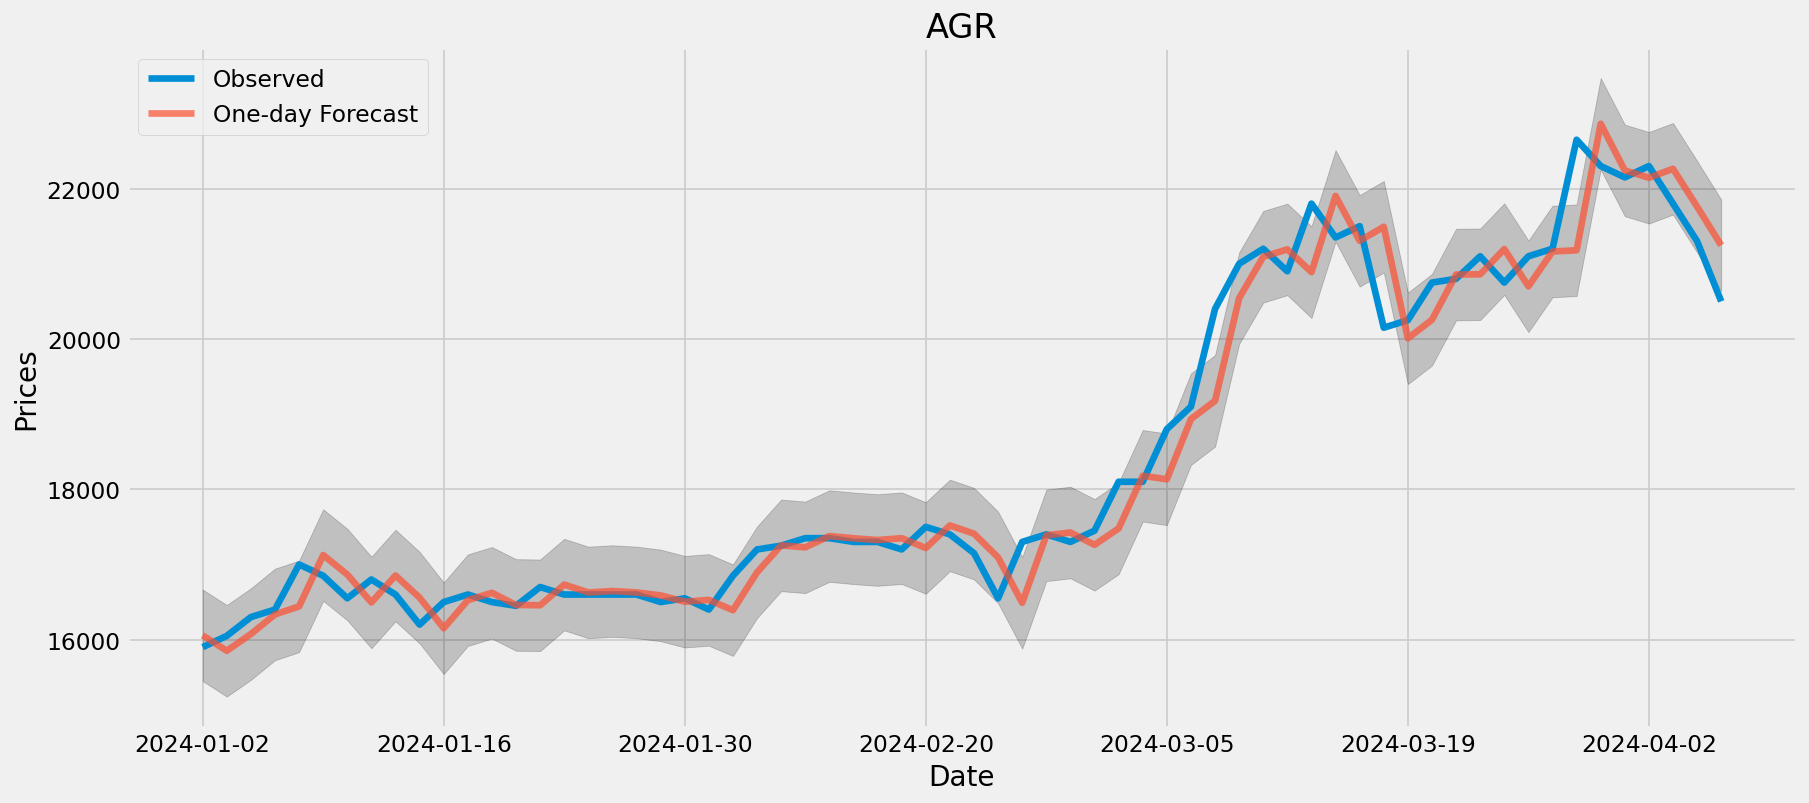

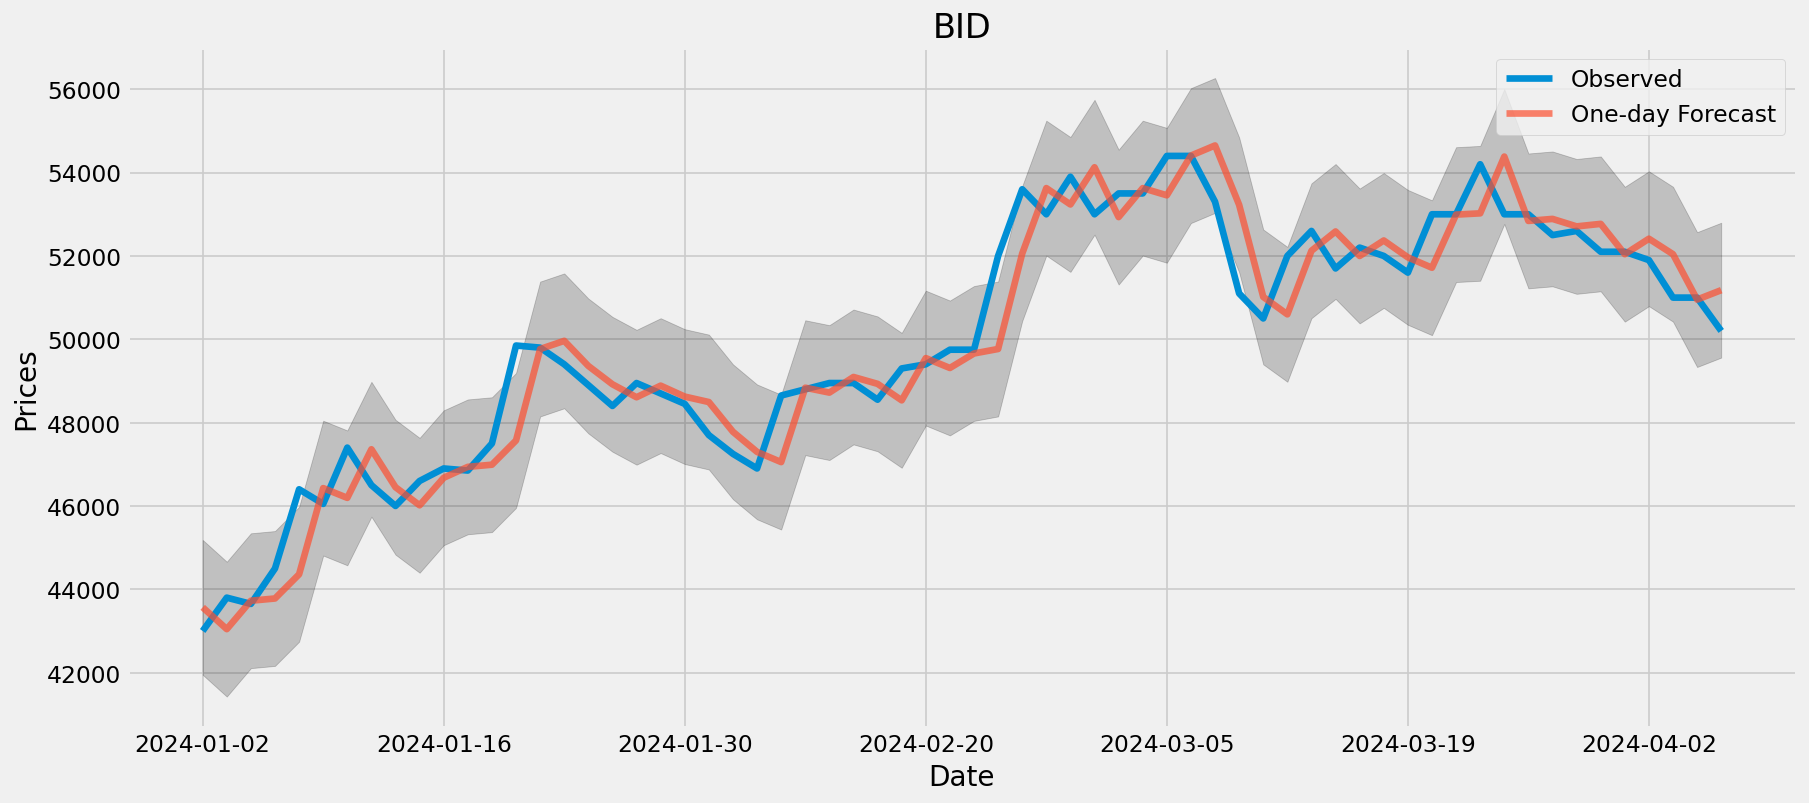

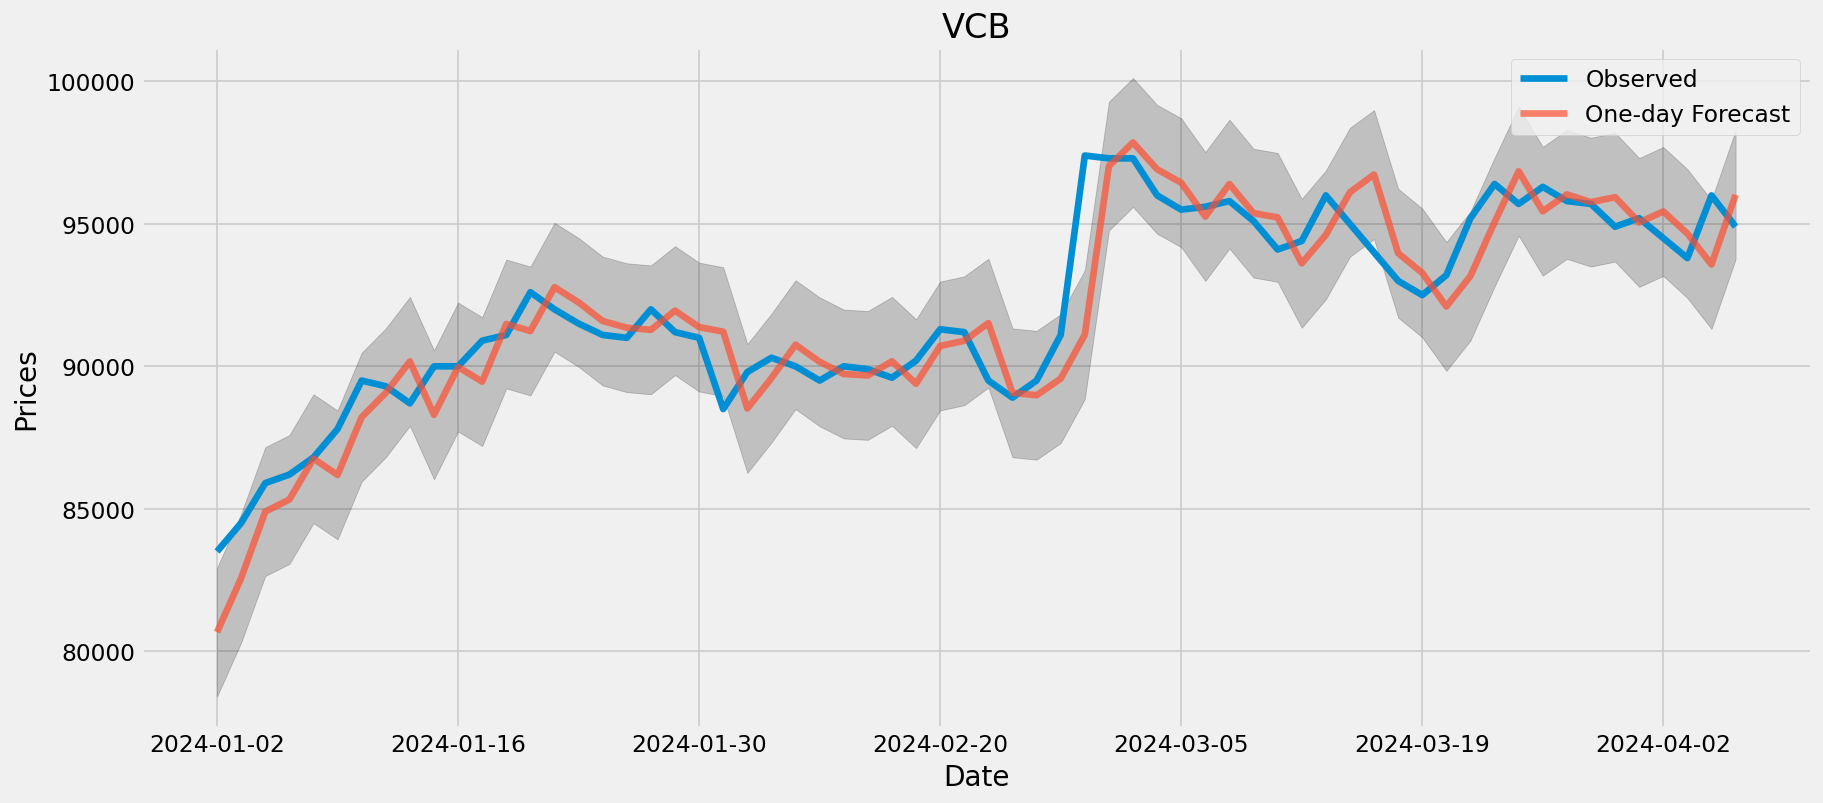

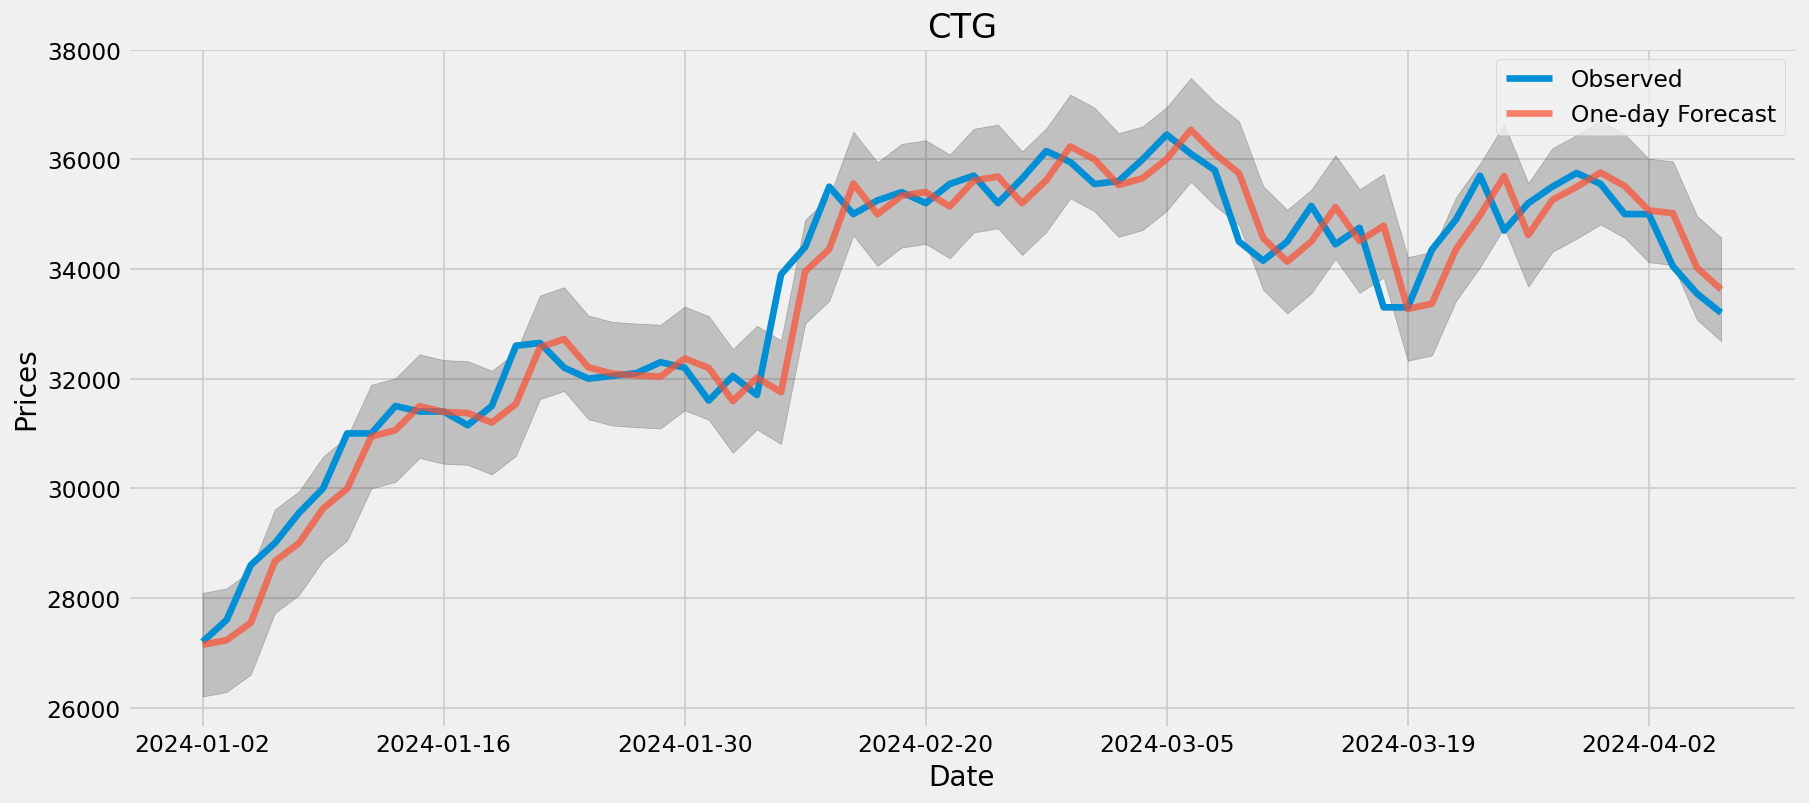

In [11]:
for i, stock in enumerate(df.columns):
    results = stock_predict[i]

    pred = results.get_prediction(start='2024-01-02', dynamic=False, full_results=True)
    pred_ci = pred.conf_int()

    ax = df[stock]['2024':].plot(label='Observed', figsize=(16,7))
    pred_plot = pred.predicted_mean
    pred_plot.plot(ax=ax, label='One-day Forecast', alpha=.7)
    y_forecasted = pred.predicted_mean
    y_truth = df['2024-01-02':]

    # Compute the mean square error
    mse = ((y_forecasted - y_truth) ** 2).mean()
    print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_title(stock)
    ax.set_xlabel('Date')
    ax.set_ylabel('Prices')
    plt.legend()
    plt.show()

In [12]:
def ARIMA_pre(stock):
    train = df[stock]

    # Sử dụng mô hình ARIMA
    history = [x for x in train]

    model = ARIMA(history, order= (1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()       
    yhat = output[0]

    return yhat

In [13]:
for stock in df.columns:
    print("Next day {} predict: {}".format(stock, ARIMA_pre(stock)))

Next day AGR predict: 20397.875750440307
Next day BID predict: 50229.02049834294
Next day VCB predict: 94901.37484936704
Next day CTG predict: 33221.52271520705


### Sử dụng mô hình để dự báo xu hướng của mã trong 3 tháng tới.

In [14]:
def Forcast(stock):
    mod = sm.tsa.statespace.SARIMAX(df[stock][:'2024-01-02'],
                                    order=(1, 1, 1),
                                    seasonal_order=(1, 1, 1, 12),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

    return mod.fit(disp=0)
    

In [15]:
def plot_forcast(stock, results, steps):
    pred_uc = results.get_forecast(steps)

    # Get confidence intervals of forecasts
    pred_uci = pred_uc.conf_int()

    ax = df[stock].plot(label='Observed', figsize=(16, 7))
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_uci.index,
                    pred_uci.iloc[:, 0],
                    pred_uci.iloc[:, 1], color='k', alpha=.25)
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Prices')
    plt.title(stock)
    plt.legend()
    plt.show()

In [16]:
stock_predict = []
for stock in df.columns:
    stock_predict.append(Forcast(stock))

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.16895D+00    |proj g|=  1.40181D-01


 This problem is unconstrained.



At iterate    5    f=  7.13414D+00    |proj g|=  3.33024D-02

At iterate   10    f=  7.13272D+00    |proj g|=  7.65195D-03

At iterate   15    f=  7.13236D+00    |proj g|=  3.99801D-03

At iterate   20    f=  7.13210D+00    |proj g|=  8.66307D-03

At iterate   25    f=  7.12963D+00    |proj g|=  4.22520D-02

At iterate   30    f=  7.05461D+00    |proj g|=  1.68035D-01

At iterate   35    f=  7.04431D+00    |proj g|=  4.49733D-02

At iterate   40    f=  7.04302D+00    |proj g|=  9.75473D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     66      1     0     0   5.381D-05   7.043D+00
  F =   7.04301839580

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.89980D+00    |proj g|=  1.42573D-01

At iterate    5    f=  7.87037D+00    |proj g|=  2.56044D-02

At iterate   10    f=  7.86972D+00    |proj g|=  1.29895D-03

At iterate   15    f=  7.86965D+00    |proj g|=  9.51166D-03

At iterate   20    f=  7.86933D+00    |proj g|=  4.90809D-03

At iterate   25    f=  7.86931D+00    |proj g|=  1.61971D-03

At iterate   30    f=  7.86911D+00    |proj g|=  3.26275D-02

At iterate   35    f=  7.86442D+00    |proj g|=  1.31945D-01

At iterate   40    f=  7.81496D+00    |proj g|=  1.54815D-01

At iterate   45    f=  7.78204D+00    |proj g|=  1.84176D-02

At iterate   50    f=  7.78185D+00    |proj g|=  1.03586D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.31554D+00    |proj g|=  1.22957D-01

At iterate    5    f=  8.29722D+00    |proj g|=  2.32254D-02

At iterate   10    f=  8.29587D+00    |proj g|=  1.16531D-02

At iterate   15    f=  8.29498D+00    |proj g|=  3.77776D-03

At iterate   20    f=  8.29464D+00    |proj g|=  9.54958D-04

At iterate   25    f=  8.29463D+00    |proj g|=  2.58303D-03

At iterate   30    f=  8.29423D+00    |proj g|=  2.99752D-02

At iterate   35    f=  8.28305D+00    |proj g|=  1.43842D-01

At iterate   40    f=  8.24171D+00    |proj g|=  2.76788D-01

At iterate   45    f=  8.20228D+00    |proj g|=  2.87580D-03

At iterate   50    f=  8.20069D+00    |proj g|=  1.05553D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.61493D+00    |proj g|=  1.18771D-01

At iterate    5    f=  7.58594D+00    |proj g|=  4.67932D-02

At iterate   10    f=  7.58369D+00    |proj g|=  1.93491D-03

At iterate   15    f=  7.58288D+00    |proj g|=  3.22123D-02

At iterate   20    f=  7.57997D+00    |proj g|=  2.51107D-02

At iterate   25    f=  7.57982D+00    |proj g|=  2.53457D-03

At iterate   30    f=  7.56523D+00    |proj g|=  1.06381D-01

At iterate   35    f=  7.50731D+00    |proj g|=  8.32355D-02

At iterate   40    f=  7.49132D+00    |proj g|=  4.16437D-02

At iterate   45    f=  7.49051D+00    |proj g|=  5.11221D-03

At iterate   50    f=  7.48932D+00    |proj g|=  3.25559D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

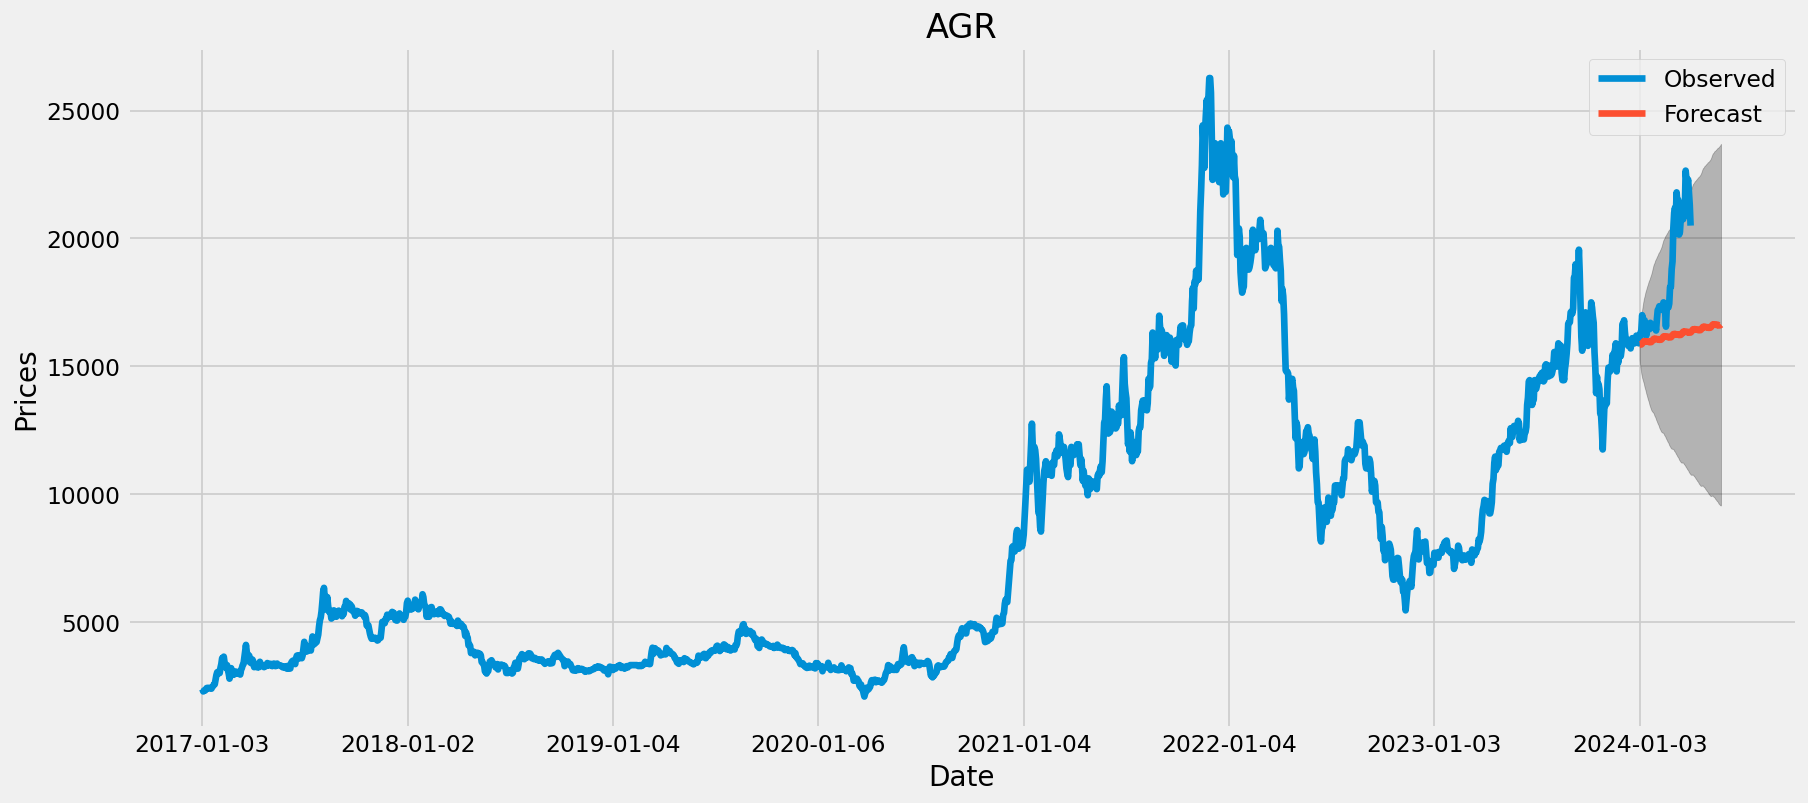

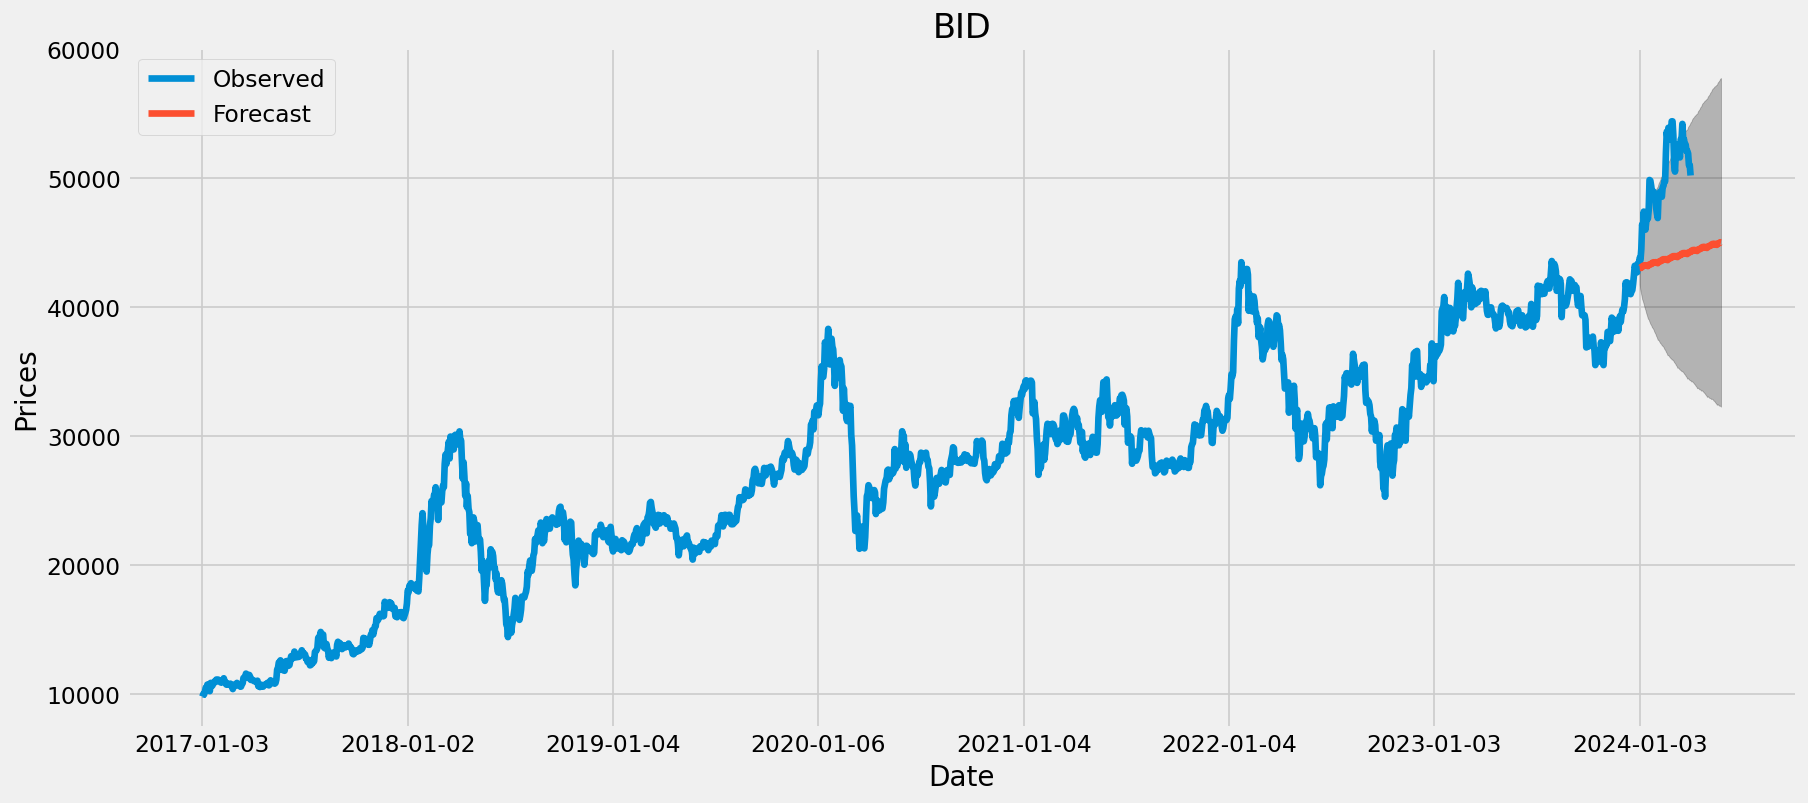

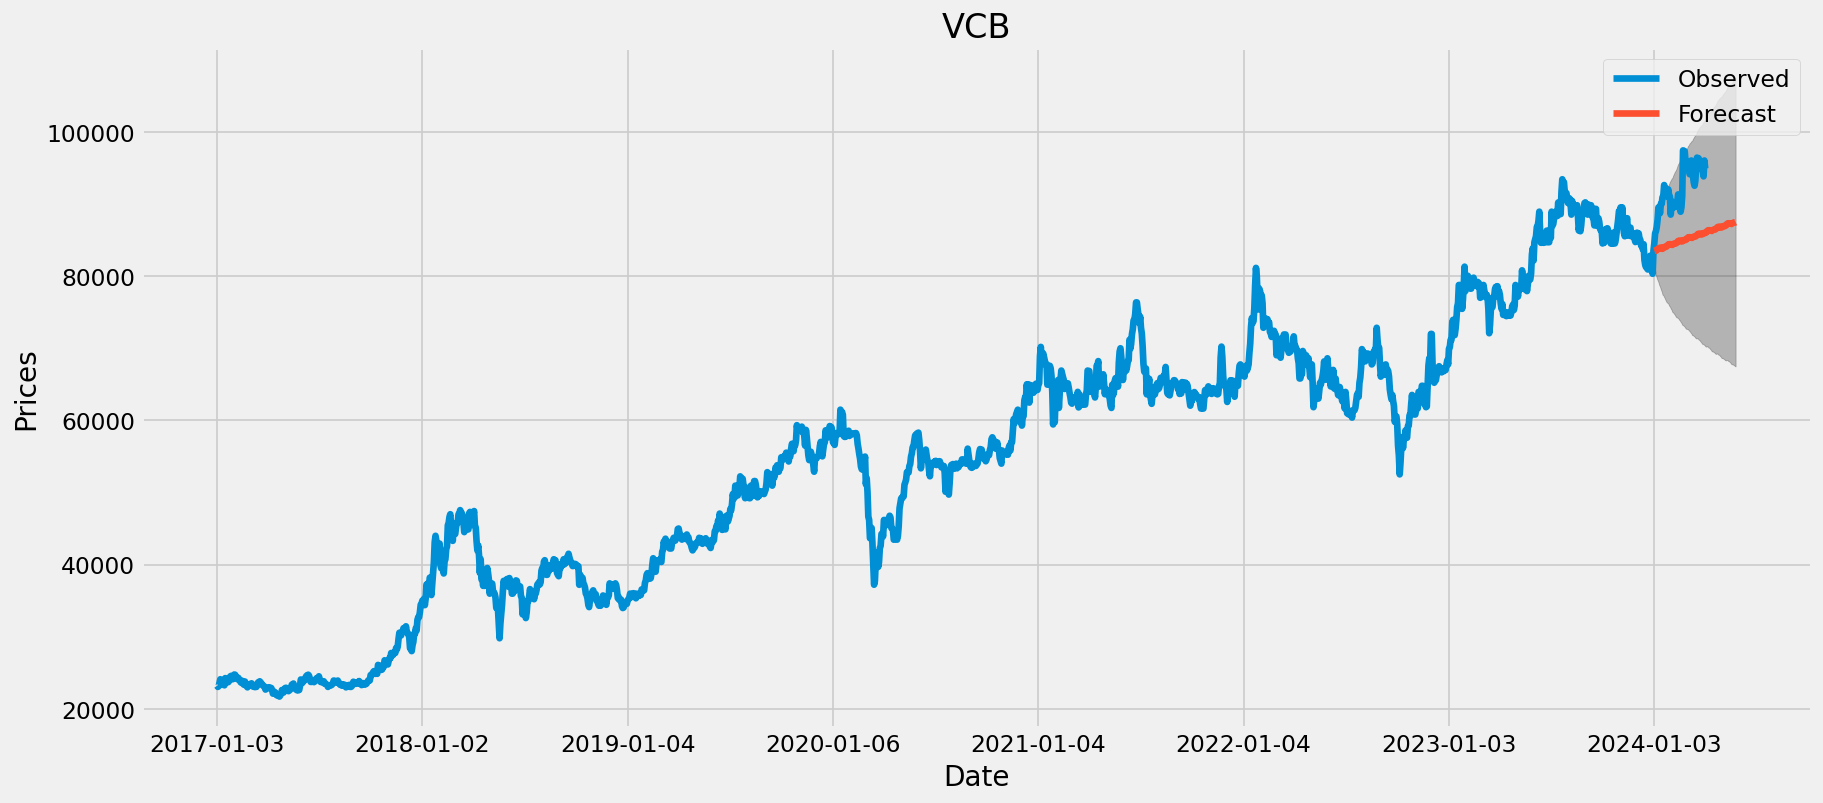

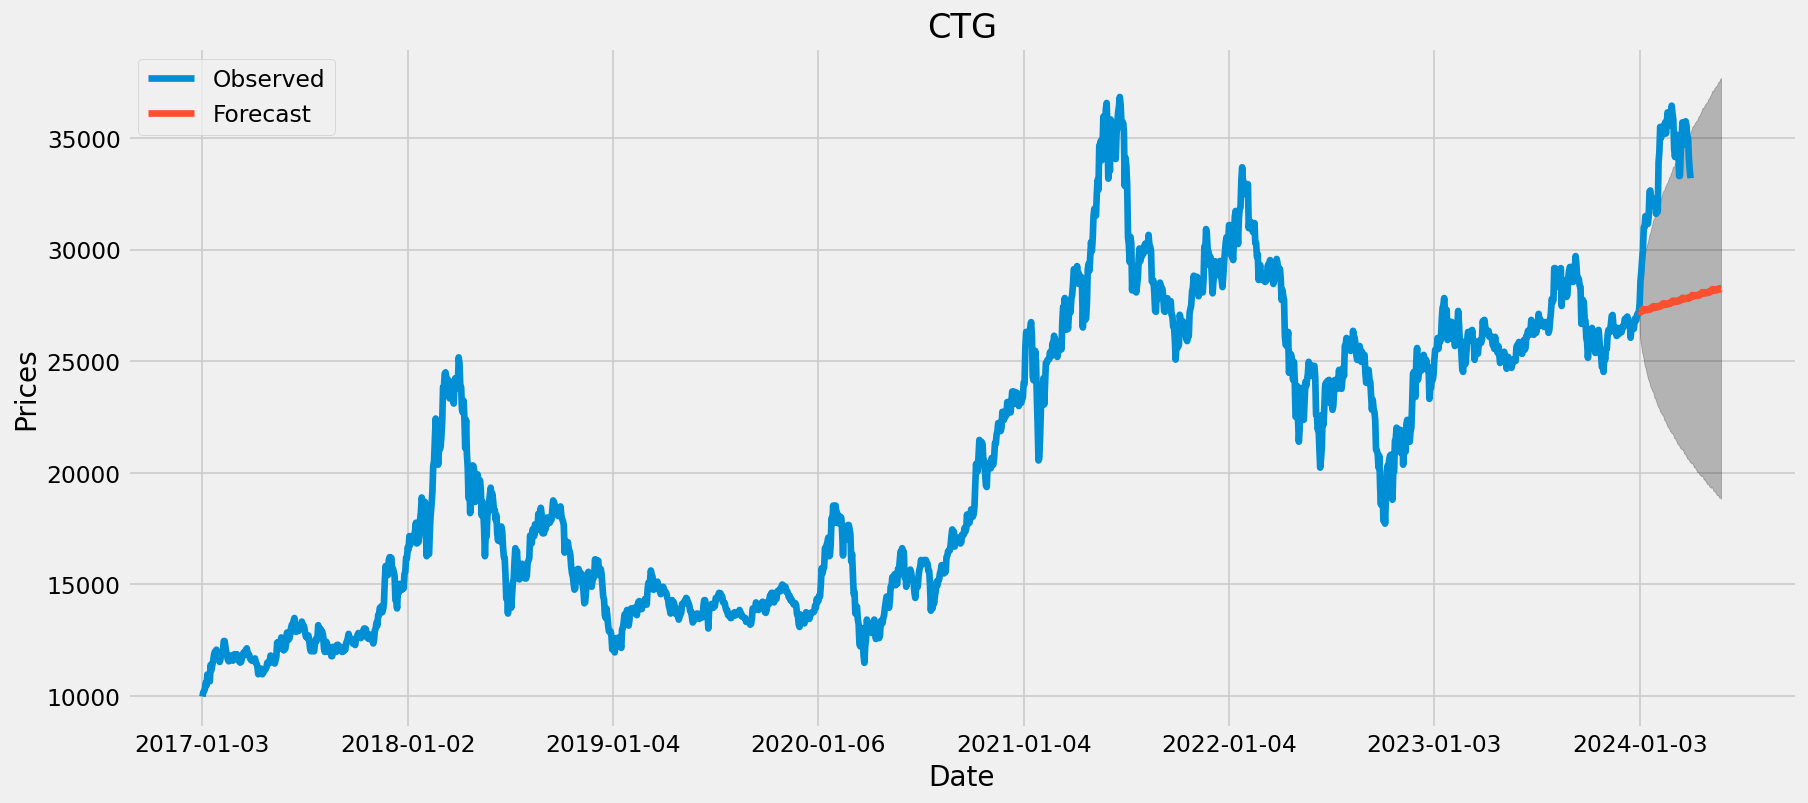

In [17]:
for i, stock in enumerate(df.columns):
    plot_forcast(stock, stock_predict[i], 100)